In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction-using-specifications/LaptopPricePrediction.csv


In [2]:
df=pd.read_csv('../input/laptop-price-prediction-using-specifications/LaptopPricePrediction.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        550 non-null    int64  
 1   Name              550 non-null    object 
 2   Processor         550 non-null    object 
 3   RAM               550 non-null    object 
 4   Operating System  550 non-null    object 
 5   Storage           550 non-null    object 
 6   Display           550 non-null    object 
 7   Warranty          550 non-null    object 
 8   Price             550 non-null    object 
 9   rating            550 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 43.1+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
Name                0
Processor           0
RAM                 0
Operating System    0
Storage             0
Display             0
Warranty            0
Price               0
rating              0
dtype: int64

In [6]:
df['Price']=df['Price'].str.replace(",","")
df['Price']=df['Price'].str.replace("₹","")

In [7]:
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,43990,3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,43990,4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,31490,4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,40990,4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,27490,4.1


In [8]:
df['Name'].value_counts()

acer Predator Helios 300 Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/N...    24
MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/NVIDIA Ge...    23
Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) S145-15IIL Laptop                     22
Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) IdeaPad 3 14ITL6 Thin and Light La...    22
Lenovo Ideapad 5 Ryzen 7 Octa Core 4700U - (8 GB/512 GB SSD/Windows 10 Home) 14ARE05 Thin and Light La...    15
                                                                                                             ..
Lenovo Legion Core i5 9th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graphics) Y540-15IRH-PG...     1
HP Pavilion Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home) 14-dv0053TU Thin and Light Laptop           1
HP 15 Core i7 8th Gen - (8 GB/1 TB HDD/128 GB SSD/Windows 10 Home/4 GB Graphics) 15-dc0082TX Laptop     

In [9]:
df['Name'].nunique()

376

In [10]:
for i in df.columns:
    count=df[i].nunique()
    print(i,count)

Unnamed: 0 550
Name 376
Processor 39
RAM 14
Operating System 6
Storage 13
Display 30
Warranty 37
Price 235
rating 21


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '8 GB DDR4 RAM'),
  Text(1, 0, '4 GB DDR4 RAM'),
  Text(2, 0, '16 GB DDR4 RAM'),
  Text(3, 0, '8 GB LPDDR4X RAM'),
  Text(4, 0, '8 GB LPDDR3 RAM'),
  Text(5, 0, '32 GB LPDDR4X RAM'),
  Text(6, 0, '16 GB LPDDR4X RAM'),
  Text(7, 0, '16 GB LPDDR3 RAM'),
  Text(8, 0, '8 GB DDR3 RAM'),
  Text(9, 0, '16 GB DDR3 RAM'),
  Text(10, 0, '32 GB DDR4 RAM'),
  Text(11, 0, 'Upgradable SSD Upto 512 GB and RAM Upto 32 GB'),
  Text(12, 0, '4 GB DDR3 RAM'),
  Text(13, 0, '12 GB DDR4 RAM')])

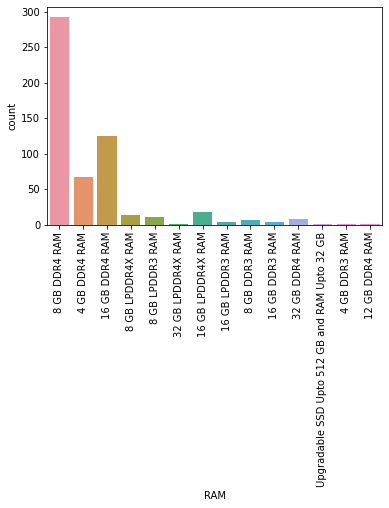

In [11]:
sns.countplot(x=df['RAM'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='count', ylabel='Operating System'>

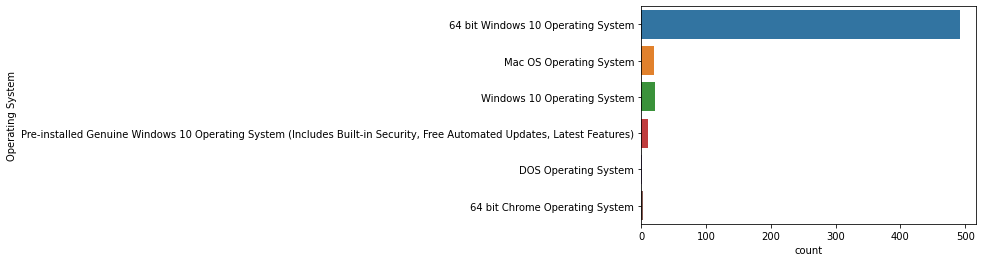

In [12]:
sns.countplot(y=df['Operating System'])
#plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1 TB HDD'),
  Text(1, 0, '256 GB SSD'),
  Text(2, 0, '1 TB HDD|256 GB SSD'),
  Text(3, 0, '512 GB SSD'),
  Text(4, 0, '1 TB SSD'),
  Text(5, 0, 'M.2 Slot for SSD Upgrade'),
  Text(6, 0, '128 GB NVMe PCIe 3.0 x4 SSD'),
  Text(7, 0, '1 TB HDD|128 GB SSD'),
  Text(8, 0, '128 GB SSD'),
  Text(9, 0, '512 GB SSD for Reduced Boot Up Time and in Game Loading'),
  Text(10, 0, '1 TB HDD|512 GB SSD'),
  Text(11, 0, '128 GB SSD for Reduced Boot Up Time and in Game Loading'),
  Text(12, 0, '512 GB HDD|512 GB SSD')])

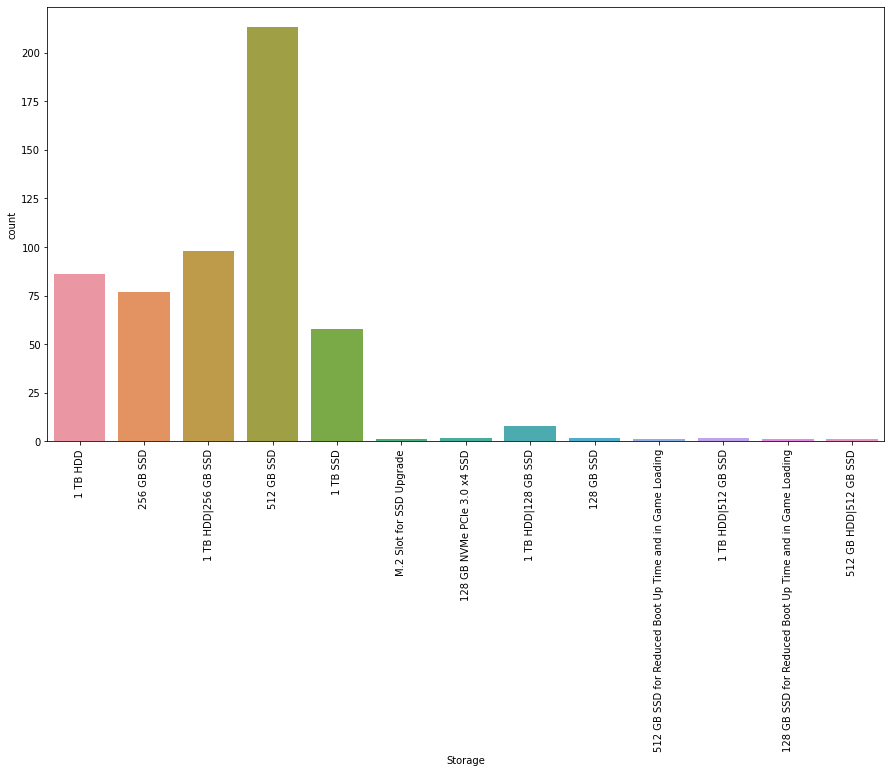

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Storage'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='count', ylabel='Display'>

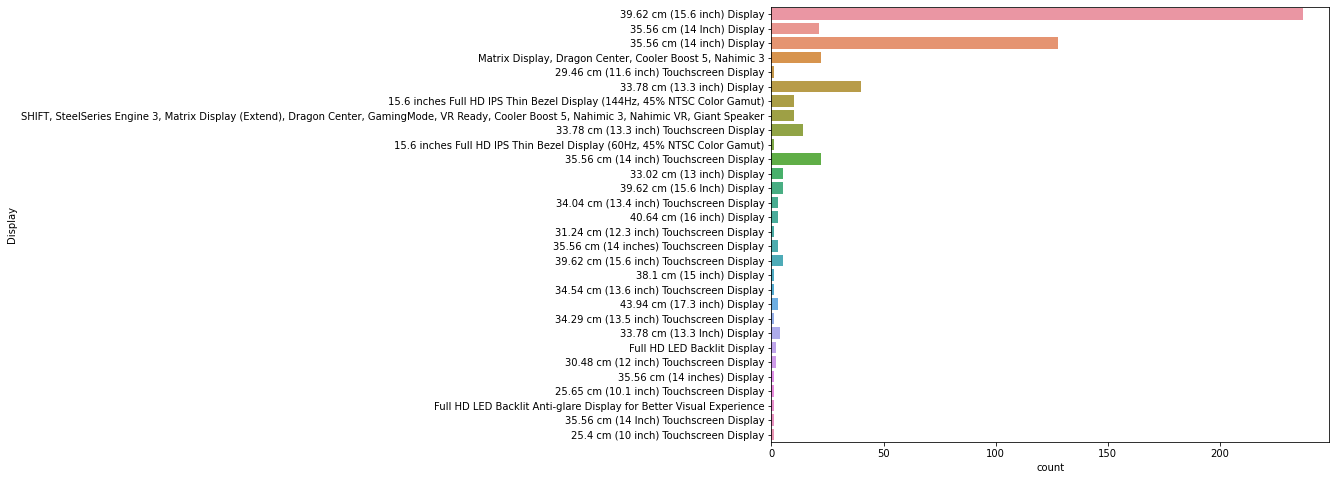

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['Display'])

<AxesSubplot:xlabel='count', ylabel='Warranty'>

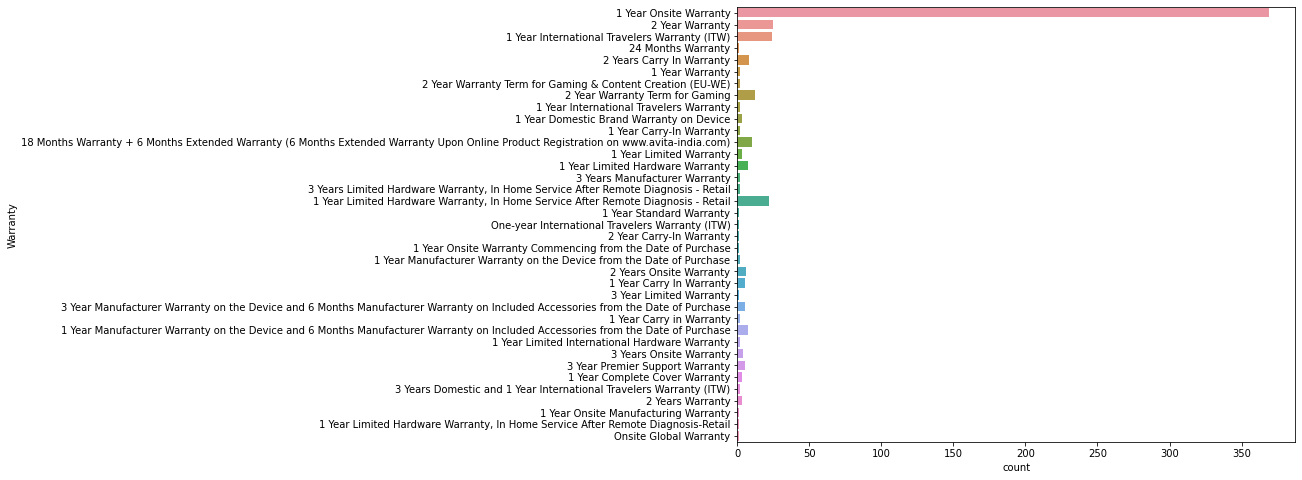

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['Warranty'])

<AxesSubplot:xlabel='rating', ylabel='count'>

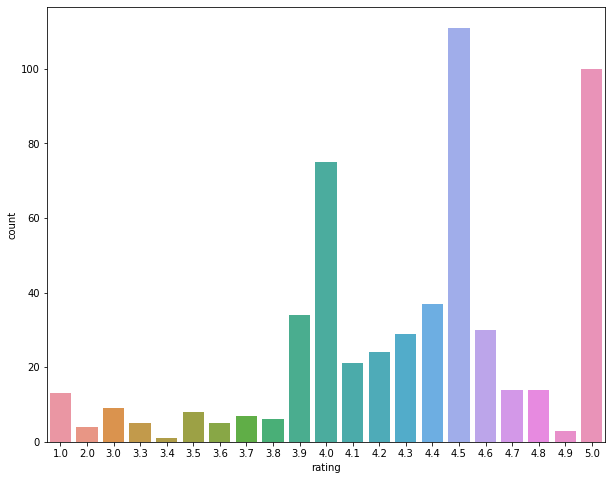

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['rating'])

In [17]:
#df['RAM']=df['RAM'].str.replace('\s.*','')
#df['Warranty']=df['Warranty'].str.replace('\s.*','')

In [18]:
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,43990,3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,43990,4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,31490,4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,40990,4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,27490,4.1


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lr=LabelEncoder()

In [21]:
df['Name']=lr.fit_transform(df['Name'])
df['Processor']=lr.fit_transform(df['Processor'])
#df['Operating System']=lr.fit_transform(df['Operating System'])
df['Storage']=lr.fit_transform(df['Storage'])
df['Display']=lr.fit_transform(df['Display'])
df['RAM']=lr.fit_transform(df['RAM'])
df['Warranty']=lr.fit_transform(df['Warranty'])
df['Price']=df['Price'].astype(str).astype(int)

In [22]:
df.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,293,22,10,64 bit Windows 10 Operating System,0,22,15,43990,3.9
1,1,270,18,10,64 bit Windows 10 Operating System,8,14,15,43990,4.2
2,2,249,37,10,64 bit Windows 10 Operating System,8,16,15,31490,4.6
3,3,192,18,10,64 bit Windows 10 Operating System,8,16,15,40990,4.1
4,4,200,2,8,64 bit Windows 10 Operating System,0,22,15,27490,4.1


In [23]:
df.drop(['rating','Operating System'],axis=1,inplace=True)

In [24]:
df.head()

,Unnamed: 0,Name,Processor,RAM,Storage,Display,Warranty,Price
0,0,293,22,10,0,22,15,43990
1,1,270,18,10,8,14,15,43990
2,2,249,37,10,8,16,15,31490
3,3,192,18,10,8,16,15,40990
4,4,200,2,8,0,22,15,27490


In [25]:
corr=df.corr()

<AxesSubplot:>

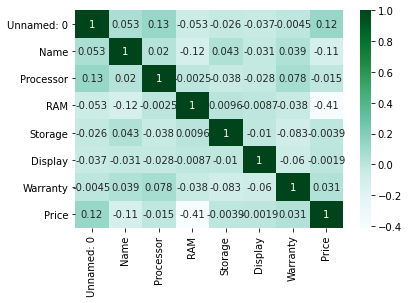

In [26]:
sns.heatmap(corr,annot=True,cmap="BuGn")

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((440, 7), (110, 7), (440,), (110,))

In [31]:
lr_model=LinearRegression()

In [32]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [33]:
predict=lr_model.predict(X_test)

In [34]:
predict

array([ 59231.1218074 ,  54868.64998267,  72930.50046353,  68103.91006505,
        89234.26753646,  82651.46333483,  55017.04919483,  65068.54598919,
        72700.8158856 ,  63422.81427528,  80075.30181311,  63545.2457964 ,
       118479.83049435,  71988.79781934, 113767.06300698,  67435.06163704,
        93143.19278191,  57415.15477981, 105289.6343741 , 118961.41682856,
       134892.12825327,  58768.35028409,  87395.81551714, 107505.56733342,
        73637.89705556,  97136.36271659,  66196.6187014 ,  81354.91381208,
       100796.75392651, 121717.02661407, 103808.40685706, 112812.64575158,
        71790.91651989,  56251.54813259,  68597.77311928,  82826.54061743,
        50312.62909107,  53338.67268703,  71042.8488377 , 113984.06671379,
       103387.31405024,  68735.00784761,  75596.55013869,  63353.35709599,
        83286.65585995,  79136.22799111,  90476.29765024,  88716.04421933,
        75378.85734309, 137575.53030813,  87988.2894789 ,  61470.0871436 ,
       105955.73639097,  

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(y_test,predict)

1637714903.022642

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,predict)

0.017092848961821394

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf_model=RandomForestRegressor()

In [41]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
rf_predict=rf_model.predict(X_test)

In [43]:
rf_predict

array([ 50551.02,  49242.  , 123615.5 ,  61233.81, 119238.4 ,  60805.27,
        62623.45,  59085.73,  57044.96,  74306.87,  58949.14,  53511.19,
        98455.  ,  40764.91, 154520.19,  59772.12,  51798.74,  50314.98,
       109140.1 ,  57880.61, 201992.43,  61462.67,  85242.96, 142526.18,
       118623.  , 142068.87,  74123.84,  69656.07,  62248.96, 101319.58,
       218196.  ,  95707.58,  92790.69,  60937.  ,  60340.79,  40647.8 ,
        55377.94,  63597.12, 102105.81,  66947.85, 110470.  ,  66100.63,
        67294.34, 109839.  ,  49720.65,  50049.86, 140511.87,  75746.79,
        41707.15,  97533.89,  86208.97,  55718.78, 133324.14,  63914.55,
       118608.94,  47847.39,  85108.06,  91233.79, 108424.2 ,  71072.34,
        87767.68,  76463.26, 115828.  , 129233.  , 124180.  ,  45260.99,
       127268.  ,  73329.23,  86429.38,  60004.47, 118240.18, 142501.4 ,
        62970.78, 116632.  , 128820.  ,  51812.72,  51488.85,  47307.15,
        90932.11, 113280.  ,  58216.43,  56112.88, 

In [44]:
r2_score(y_test,rf_predict)

0.44172453678247114